# Playground

The notebook where random scripts and commands are placed.

In [1]:
import os
from osgeo import gdal

In [2]:
from dotenv import load_dotenv
load_dotenv()
username = os.getenv('FTP_USERNAME')

from ftplib import FTP
ftp = FTP('ftp.gportal.jaxa.jp')
ftp.login(username, 'anonymous');

In [3]:
tile = (7, 28)
v, h = tile

In [4]:
base = 'downloads'

dir = "standard/GCOM-C/GCOM-C.SGLI/L2.LAND.LST_/3/2023/09/01"
os.makedirs(os.path.join(base, dir), exist_ok=True)

# Ascending data
filename_a = 'GC1SG1_20230901A01D_T{:02d}{:02d}_L2SG_LST_Q_3000.h5'.format(v, h)
with open(os.path.join(base, dir, filename_a), 'wb') as f:
    ftp.retrbinary(f"RETR /{dir}/{filename_a}", f.write)

# Descending data
filename_a = 'GC1SG1_20230901D01D_T{:02d}{:02d}_L2SG_LST_Q_3000.h5'.format(v, h)
with open(os.path.join(base, dir, filename_a), 'wb') as f:
    ftp.retrbinary(f"RETR /{dir}/{filename_a}", f.write)

In [5]:
downloaded_dir = "downloads/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.LST_/3/2023/09/01"
output_dir = "output/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.LST_/3/2023/09/01"
os.makedirs(output_dir, exist_ok=True)

# Ascending data
downloaded_filename_a = "GC1SG1_20230901A01D_T{:02d}{:02d}_L2SG_LST_Q_3000.h5".format(v, h)
downloaded_a = gdal.Open(os.path.join(downloaded_dir, downloaded_filename_a), gdal.GA_ReadOnly)

# Descending data
downloaded_filename_d = "GC1SG1_20230901D01D_T{:02d}{:02d}_L2SG_LST_Q_3000.h5".format(v, h)
downloaded_d = gdal.Open(os.path.join(downloaded_dir, downloaded_filename_d), gdal.GA_ReadOnly)

In [6]:
downloaded_d.GetMetadata()

{'Geometry_data_Grid_interval': '0.0020833334 ',
 'Geometry_data_Grid_interval_unit': 'deg',
 'Geometry_data_Image_projection': 'EQA (sinusoidal equal area) projection from 0-deg longitude',
 'Geometry_data_Lower_left_latitude': '10 ',
 'Geometry_data_Lower_left_longitude': '101.54266 ',
 'Geometry_data_Lower_right_latitude': '10 ',
 'Geometry_data_Lower_right_longitude': '111.69693 ',
 'Geometry_data_Number_of_lines': '4800 ',
 'Geometry_data_Number_of_pixels': '4800 ',
 'Geometry_data_Obs_time_Data_description': 'Observation time (hour)',
 'Geometry_data_Obs_time_Error_DN': '-128 ',
 'Geometry_data_Obs_time_Maximum_valid_DN': '127 ',
 'Geometry_data_Obs_time_Minimum_valid_DN': '-127 ',
 'Geometry_data_Obs_time_Offset': '2.6190002 ',
 'Geometry_data_Obs_time_Resampling_interval': '1 ',
 'Geometry_data_Obs_time_Resampling_interval_unit': 'NA',
 'Geometry_data_Obs_time_Slope': '0.001 ',
 'Geometry_data_Obs_time_Unit': 'hour',
 'Geometry_data_Upper_left_latitude': '20 ',
 'Geometry_data_

In [38]:
downloaded_a.GetSubDatasets()

[('HDF5:"downloads/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.LST_/3/2023/09/01/GC1SG1_20230901A01D_T0529_L2SG_LST_Q_3000.h5"://Geometry_data/Obs_time',
  '[4800x4800] //Geometry_data/Obs_time (8-bit signed character)'),
 ('HDF5:"downloads/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.LST_/3/2023/09/01/GC1SG1_20230901A01D_T0529_L2SG_LST_Q_3000.h5"://Image_data/E01',
  '[4800x4800] //Image_data/E01 (8-bit character)'),
 ('HDF5:"downloads/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.LST_/3/2023/09/01/GC1SG1_20230901A01D_T0529_L2SG_LST_Q_3000.h5"://Image_data/E02',
  '[4800x4800] //Image_data/E02 (8-bit character)'),
 ('HDF5:"downloads/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.LST_/3/2023/09/01/GC1SG1_20230901A01D_T0529_L2SG_LST_Q_3000.h5"://Image_data/LST',
  '[4800x4800] //Image_data/LST (16-bit unsigned integer)'),
 ('HDF5:"downloads/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.LST_/3/2023/09/01/GC1SG1_20230901A01D_T0529_L2SG_LST_Q_3000.h5"://Image_data/QA_flag',
  '[4800x4800] //Image_data/QA_flag (16-bit unsigned integer)')

In [39]:
downloaded_a.GetSubDatasets()[3][0]

'HDF5:"downloads/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.LST_/3/2023/09/01/GC1SG1_20230901A01D_T0529_L2SG_LST_Q_3000.h5"://Image_data/LST'

In [8]:
image_ds_a = gdal.Open(downloaded_a.GetSubDatasets()[3][0], gdal.GA_ReadOnly)
image_ds_a.GetRasterBand(1).SetScale(0.02)
image_ds_a.GetRasterBand(1).SetOffset(0)

output_filename_a = "GC1SG1_20230901A01D_T0728_L2SG_LST_Q_3000.tif"
gdal.Translate(
    os.path.join(output_dir, output_filename_a),
    image_ds_a,
    format="GTiff",
    outputSRS="EPSG:4326",
    outputBounds=[-180, 90, 180, -90],
    noData=65535,
    creationOptions=['COMPRESS=LZW'])

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0xffff7fd6cff0> >

In [38]:
(upper_left_lng, upper_left_lat) = (
    float(downloaded_d.GetMetadata()['Geometry_data_Upper_left_longitude']),
    float(downloaded_d.GetMetadata()['Geometry_data_Upper_left_latitude'])
)
(lower_right_lng, lower_right_lat) = (
    float(downloaded_d.GetMetadata()['Geometry_data_Lower_right_longitude']),
    float(downloaded_d.GetMetadata()['Geometry_data_Lower_right_latitude'])
)
[(upper_left_lng, upper_left_lat), (lower_right_lng, lower_right_lat)]

[(106.41778, 20.0), (111.69693, 10.0)]

In [39]:
r = 6371000
d = 0.017453292519943295

import math
(lng1_proj, lat1_proj) = (r * d * upper_left_lng * math.cos(upper_left_lat * math.pi / 180), r * d * upper_left_lat)
(lng2_proj, lat2_proj) = (r * d * lower_right_lng * math.cos(lower_right_lat * math.pi / 180), r * d * lower_right_lat)
[(lng1_proj, lat1_proj), (lng2_proj, lat2_proj)]

[(11119492.95205246, 2223898.532891175),
 (12231442.22575281, 1111949.2664455874)]

In [40]:
!gdal_translate \
    -of Gtiff \
    -a_srs ESRI:53008 \
    -a_ullr 11119492.95205246 2223898.532891175 12231442.22575281 1111949.2664455874 \
    HDF5:"downloads/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.LST_/3/2023/09/01/GC1SG1_20230901D01D_T0728_L2SG_LST_Q_3000.h5"://Image_data/LST \
    output/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.LST_/3/2023/09/01/GC1SG1_20230901D01D_T0728_L2SG_LST_Q_3000.tif

Input file size is 4800, 4800
0...10...20...30...40...50...60...70...80...90...100 - done.


In [41]:
!gdalwarp -of Gtiff -t_srs EPSG:4326 \
    output/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.LST_/3/2023/09/01/GC1SG1_20230901D01D_T0728_L2SG_LST_Q_3000.tif \
    output/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.LST_/3/2023/09/01/GC1SG1_20230901D01D_T0728_L2SG_LST_Q_3000.reprojected.tif

Creating output file that is 9315P x 6003L.
Processing output/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.LST_/3/2023/09/01/GC1SG1_20230901D01D_T0728_L2SG_LST_Q_3000.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [12]:
!pip install h5py scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.9/112.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 10.6 MB/s eta 0:00:0000:0100:01


In [40]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

filename = os.path.join(downloaded_dir, downloaded_filename_a)

# ■ HDF読込・表示
with h5py.File(filename, 'r') as f:
    Data0 = np.array(f['/Image_data/LST']).T

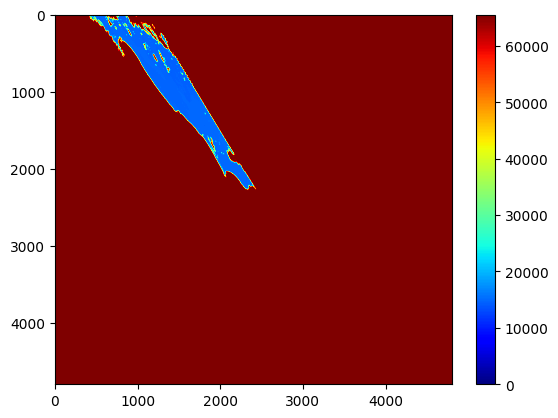

In [41]:
# ■ Display as is
plt.imshow(Data0, vmin=0, vmax=65534, aspect='auto', cmap='jet')
plt.colorbar()
plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# ■ 関心領域 投影前緯度経度
LatRef = np.linspace(40, 30, 4800)
LonRef = np.linspace(110, 120, 4800)
LLroi_Lat = np.outer(LatRef, np.ones(4800))
LLroi_Lon = 1 / np.cos(np.outer(LatRef, np.pi / 180)) * LonRef
(LLroi_Lat, LLroi_Lon)

(array([[40.        , 40.        , 40.        , ..., 40.        ,
         40.        , 40.        ],
        [39.99791623, 39.99791623, 39.99791623, ..., 39.99791623,
         39.99791623, 39.99791623],
        [39.99583247, 39.99583247, 39.99583247, ..., 39.99583247,
         39.99583247, 39.99583247],
        ...,
        [30.00416753, 30.00416753, 30.00416753, ..., 30.00416753,
         30.00416753, 30.00416753],
        [30.00208377, 30.00208377, 30.00208377, ..., 30.00208377,
         30.00208377, 30.00208377],
        [30.        , 30.        , 30.        , ..., 30.        ,
         30.        , 30.        ]]),
 array([[143.59480183, 143.59752199, 143.60024216, ..., 156.64343439,
         156.64615455, 156.64887472],
        [143.59041999, 143.59314007, 143.59586015, ..., 156.63865437,
         156.64137445, 156.64409453],
        [143.58603861, 143.58875861, 143.59147861, ..., 156.63387485,
         156.63659485, 156.63931485],
        ...,
        [127.02239384, 127.02480007,

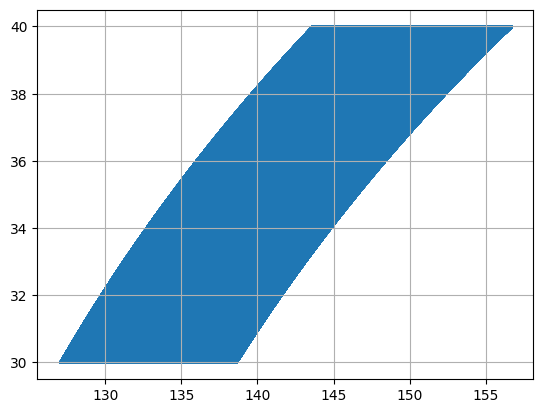

In [43]:
# ■ 散布画像表示
plt.scatter(LLroi_Lon.flatten(), LLroi_Lat.flatten(), s=1)
plt.grid()
plt.show()

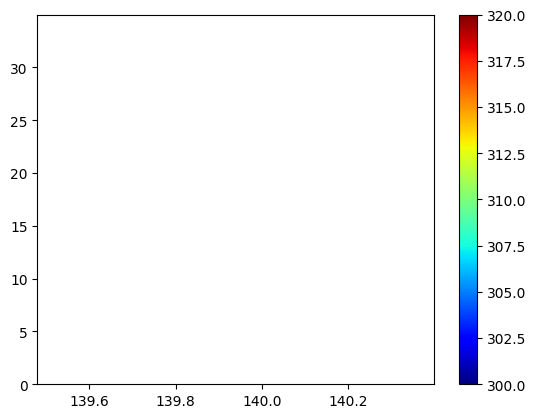

In [44]:
# ■ 関心領域 投影前緯度経度
LatRef = np.linspace(40, 30, 4800)
LonRef = np.linspace(110, 120, 4800)
LLroi = {}
LLroi['Lat'] = np.outer(LatRef, np.ones(4800))
LLroi['Lon'] = 1 / np.cos(np.outer(LatRef, np.pi / 180)) * LonRef

# ■ データの抽出
ROI = {}
ROI['Lat'] = [35.33, 35.81]
ROI['Lon'] = [139.53, 140.35]
IDX = np.where((LLroi['Lat'] >= ROI['Lat'][0] - 0.05) &
               (LLroi['Lat'] <= ROI['Lat'][1] + 0.05) &
               (LLroi['Lon'] >= ROI['Lon'][0] - 0.05) &
               (LLroi['Lon'] <= ROI['Lon'][1] + 0.05))

# ■ 出力グリッド
DDeg = 10 / 4800
Latg = np.arange(max(LLroi['Lat'][IDX]))[::-1] - DDeg
Long = np.arange(min(LLroi['Lon'][IDX]), max(LLroi['Lon'][IDX]), DDeg)
LLg_Lat, LLg_Lon = np.meshgrid(Latg, Long)

# ■ 離散データを投影
from scipy.interpolate import griddata

points = np.column_stack((LLroi['Lat'][IDX].flatten(), LLroi['Lon'][IDX].flatten()))
values = Data0[IDX].flatten()
Data2 = griddata(points, values, (LLg_Lat, LLg_Lon), method='linear')

# ■ 画像表示
plt.imshow(Data2, extent=[Long[0], Long[-1], Latg[-1], Latg[0]], vmin=300, vmax=320, aspect='auto', cmap='jet')
plt.colorbar()
plt.show()